#IN THE NAME OF GOD
###CA1 Aidin Kazemi

###Student ID: 810101561

<hr>

##Question 1##

In [1]:
!gdown 15VJIqIftVYQEdCOJ3pfjGuxr3vh61bnc
!gdown 1CcqsC9xuF0OLjD4LGqyp--QHZNlYSiey
!gdown 1pD8eLaMKs8eFgToq682P6ZLR3E3-L18y
!gdown 1xLP18CzhYLHZP1V3UumNwEuBmBl6kQBL

Downloading...
From: https://drive.google.com/uc?id=15VJIqIftVYQEdCOJ3pfjGuxr3vh61bnc
To: /content/q1_Page_1.png
100% 314k/314k [00:00<00:00, 38.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CcqsC9xuF0OLjD4LGqyp--QHZNlYSiey
To: /content/q1_Page_2.png
100% 85.5k/85.5k [00:00<00:00, 71.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pD8eLaMKs8eFgToq682P6ZLR3E3-L18y
To: /content/q1_Page_3.png
100% 267k/267k [00:00<00:00, 20.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xLP18CzhYLHZP1V3UumNwEuBmBl6kQBL
To: /content/q1_Page_4.png
100% 128k/128k [00:00<00:00, 70.4MB/s]


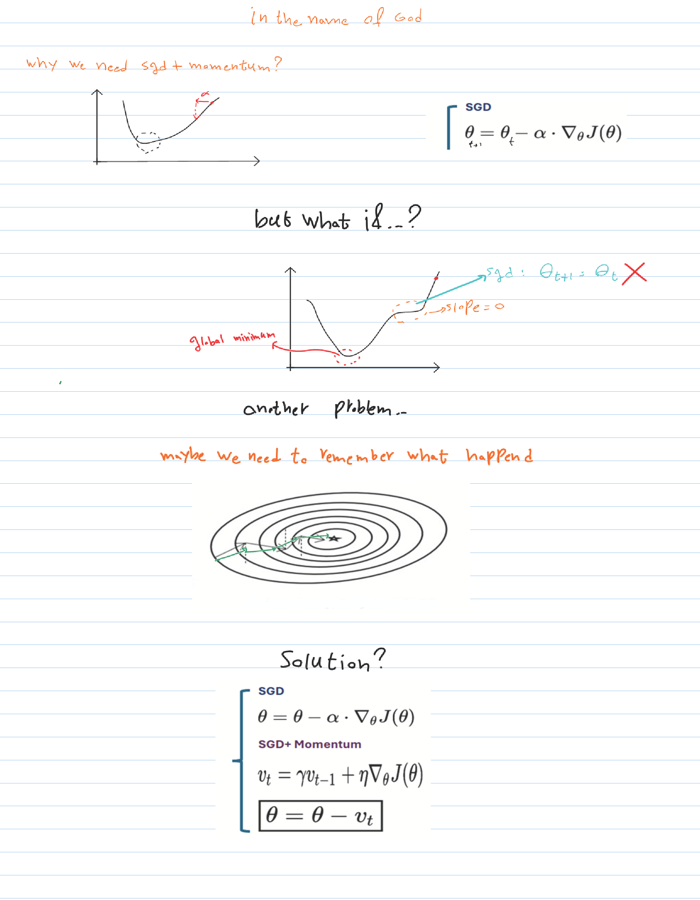

In [8]:
from PIL import Image
from IPython.display import display

img = Image.open("/content/q1_Page_1.png")
img_resized = img.resize((700, 900))
display(img_resized)


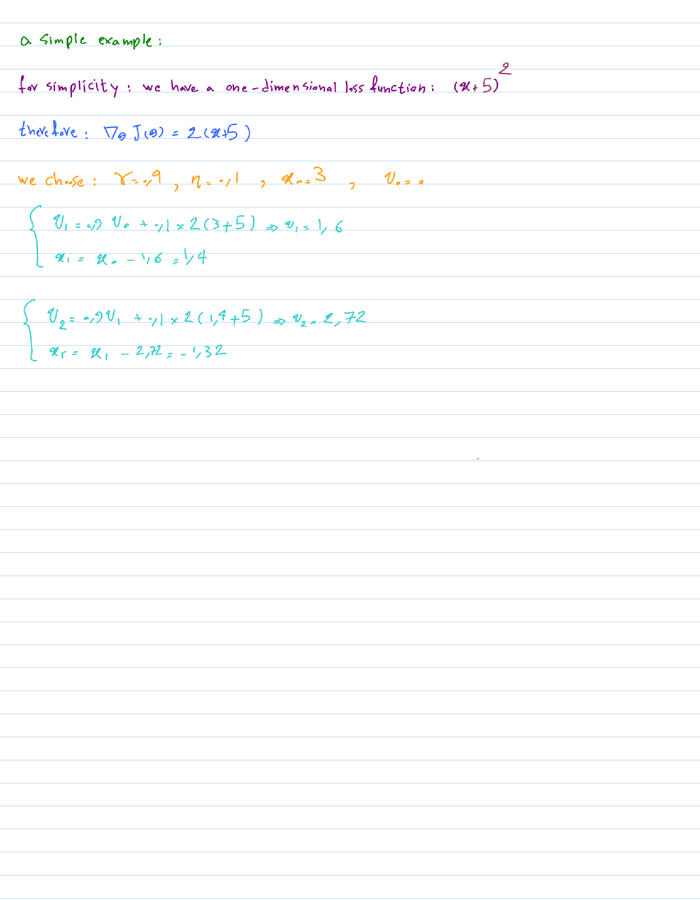

In [9]:
img = Image.open("/content/q1_Page_2.png")
img_resized = img.resize((700, 900))
display(img_resized)

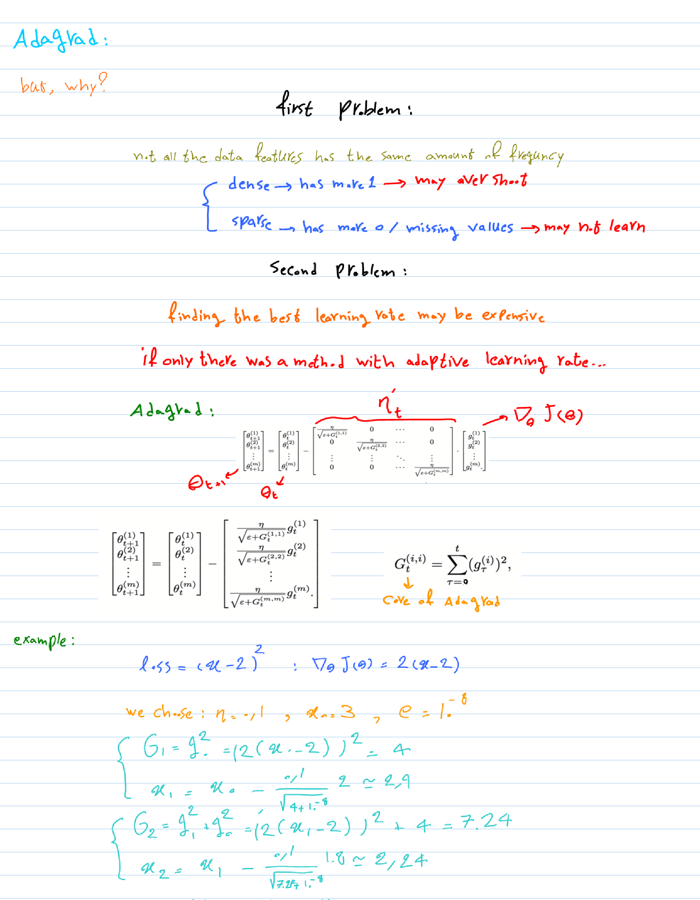

In [10]:
img = Image.open("/content/q1_Page_3.png")
img_resized = img.resize((700, 900))
display(img_resized)

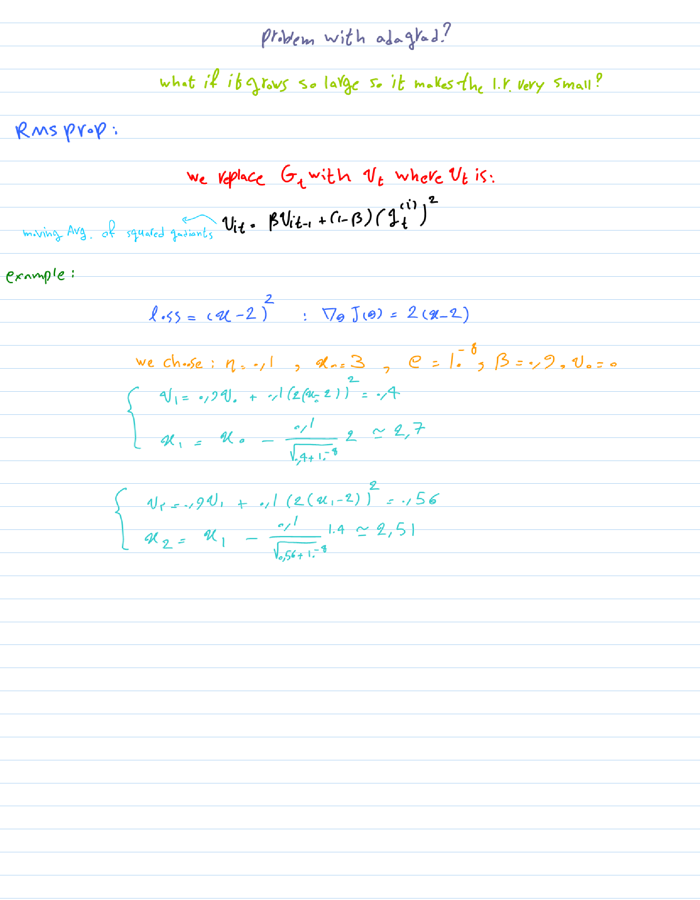

In [11]:
img = Image.open("/content/q1_Page_4.png")
img_resized = img.resize((700, 900))
display(img_resized)

<hr>

##Question 2##

SGD with Momentum:

Advantages: Momentum helps accelerate SGD in the relevant direction and reduces noise. It’s particularly useful for escaping local minimum, and also in settings where SGD would oscillate or move very slowly.
Disadvantages: Momentum can lead to overshooting the minimum if the momentum term is too high. It also does not automatically adjust the learning rate during training, which can be a limitation in some scenarios.

AdaGrad:

Advantages: AdaGrad adapts the learning rate to the parameters, performing larger updates for infrequent parameters and smaller updates for frequent ones. This makes it suitable for dealing with sparse data and different scales of parameters.
Disadvantages: The main drawback of AdaGrad is its accumulation of squared gradients in the denominator: since every added term is positive, the accumulated sum keeps growing during training, causing the learning rate to shrink and eventually become very small.

RMSprop:

Advantages: RMSprop is designed to solve the diminishing learning rates of AdaGrad. It uses a moving average of squared gradients to normalize the gradient itself, which could help us in cases that adagrad couldn't preforme well due to it's aggressive gradient change.
Disadvantages: While RMSprop performs well in many scenarios, it might not be the best choice for functions with noisy gradients or when fine-tuning is required at the later stages of training.

Each technique has its own strengths and is chosen based on the specific needs of the task.

  **SGD with momentum** helps in building advanced models by accelerating the learning process and having faster convergence, and therefore it is suitable for some deep learning tasks where we are not facing sparse data.

 **AdaGrad** is effective for tasks that involve a lot of different features that don’t occur frequently (sparse data), as it has an adaptive learning rate. therefore it's suitable for tasks where we are facing sparse data, like language-related tasks.

 **RMSprop** is an advanced version of adagrad, and therefore it's preferred more among these three for many tasks like general deep learning or some more complex tasks like image classification as it's having adaptive gradient and is better in dealing with vanishing and exploding gradient problems.

references:

(1) understanding deep learning optimizers: https://towardsdatascience.com/understanding-deep-learning-optimizers-momentum-adagrad-rmsprop-adam-e311e377e9c2

(2) An overview of gradient descent optimizers: https://arxiv.org/pdf/1609.04747.pdf

<hr>



##Question 3##

### What is SMOTE?
SMOTE stands for **Synthetic Minority Over-sampling Technique**. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”. It's specifically designed to solve the challenge of imbalanced classification datasets. In such datasets, the number of examples in the minority class is greatly smaller than the majority class. Traditional machine learning techniques will ignore the minority class to solve this problem, which will lead to poor preferences.

### How Does SMOTE Work?
1. **specifiying k**: k is the number of how many nearest neighbors we want to select for each example.
2. **specifying the amount of oversampling**: specifying what percentage of minority class we want to SMOTE. this can be more than 100%.
3. **Selecting Examples**: if the amount of over sampling is less than 100% we must randomly select a subset of our minority class.
4. **Creating Synthetic Examples**: For each selected example, SMOTE finds it's k nearest neighbors and draws a line between that example and those k nearest neighbors (typically k=5). It then generates new synthetic examples along these line. the number of new examples is chosen according to oversampling percentage. for example if we have 200% then we must randomly choose 2 of these nearest neighbores and generate an example between them.

### Mathematical Intuition of SMOTE
Let's denote:
- **x**: An example from the minority class.
- **x_i**: One of its k nearest neighbors which will be selected randomly.

The synthetic example **x_new** is generated as follows:
$x_{new} = x + \lambda \cdot (x_i - x)$

Here, $\lambda$ is a random value between 0 and 1.

###***an example***###

In [ ]:
from IPython.display import Image
display(Image(url="https://miro.medium.com/v2/resize:fit:1100/format:webp/0*_2jyWCGvJFlhLX_0"))

image source: https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c

### how does SMOTE help us?
SMOTE generates new data points by interpolating between existing minority class instances. this will solve the problem with some older methods such as repeating the data for minor class or dropping samples from larger class, as it's making new data points which will lead to a better generalization. also These synthetic samples help balance the minor class distribution and hence reduce bias, ultimately enhancing the performance of classifiers on imbalanced datasets.


# ***code example***
first We import necessary libraries: pandas for dataset and numpy for numerical operations, tensorflow for building neural networks, SMOTE from imblearn.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from imblearn.over_sampling import SMOTE

We generate a sample imbalanced dataset with 10000 samples and 10 features and make a binary classification using sklearn. The imbalance ratio is 8:2 (80% "0" class and 20% "1" class).

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, weights=[0.2, 0.8])
data = pd.DataFrame(X,columns=[f"Feature_{i}" for i in range(10)])
data['Label'] = y

we then divide our data into test and train datasets with test ratio of 0.2.

In [ ]:
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

X_train, y_train = train_data.drop('Label', axis=1), train_data['Label']
X_test, y_test = test_data.drop('Label', axis=1), test_data['Label']

y_train.head(15)
X_train.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9
110,2.540899,-3.002096,0.036390,1.531924,0.063797,1.447901,-0.501762,2.589619,-0.046600,-1.394418
270,0.823471,-0.434385,-0.191726,0.240104,0.355968,1.386916,-0.244354,1.405917,0.337883,1.984992
875,-0.520045,1.467190,0.713693,0.017976,2.118117,1.156710,0.029696,0.367235,0.762160,-0.929162
941,-0.276682,1.021679,0.579045,-1.551462,1.298617,1.026203,-1.595429,0.449044,-1.083612,0.208345
591,-0.185031,0.890945,-0.315337,0.443064,0.512434,1.040183,-1.338677,0.518836,0.533282,-0.480373


We define a function "create_nn_model()" to create a simple neural network model with three dense layers. The input shape is a vector of 10, corresponding to the number of features. The output layer uses sigmoid activation for binary classification and the hidden layers use relu to prevent vanishing gradiant. We compile the model with RMSprop optimizer and binary cross-entropy loss.

In [ ]:
def create_nn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

We create a regular neural network model using the defined function and train it on the imbalanced dataset X_train with labels y_train for 10 epochs using a batch size of 32.

In [ ]:
regular_model = create_nn_model()
regular_model.fit(x = X_train,y =  y_train, epochs=10, validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 1s 13ms/step - loss: 0.5992 - accuracy: 0.7156 - val_loss: 0.5108 - val_accuracy: 0.8062
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4750 - accuracy: 0.8172 - val_loss: 0.4188 - val_accuracy: 0.8125
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.8328 - val_loss: 0.3475 - val_accuracy: 0.8375
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3268 - accuracy: 0.8578 - val_loss: 0.2928 - val_accuracy: 0.8562
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2730 - accuracy: 0.8953 - val_loss: 0.2507 - val_accuracy: 0.8938
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2301 - accuracy: 0.9156 - val_loss: 0.2157 - val_accuracy: 0.9250
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.1928 - accuracy: 0.9312 - val_loss: 0.1855 - val_accuracy: 0.9375
Epoch 8/10
20/20 [=

In [ ]:
regular_test_loss, regular_test_accuracy = regular_model.evaluate(X_test, y_test)
regular_test_accuracy

7/7 [==============================] - 0s 3ms/step - loss: 0.1387 - accuracy: 0.9650


0.9649999737739563

We initialize a SMOTE object and apply it to the imbalanced dataset to balance the classes. fit_resample method oversamples the minority class to match the majority class and the sampling strategy will make these oversamplings continue untill the minority class reaches 75% of majority class.

In [ ]:
smote = SMOTE(sampling_strategy=0.5, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

We create another neural network model using the same architecture as before and train it on the balanced dataset (X_resampled and y_resampled):

In [ ]:
balanced_model = create_nn_model()
balanced_model.fit(X_resampled, y_resampled, epochs=10, batch_size=32)

Epoch 1/10
31/31 [==============================] - 1s 2ms/step - loss: 0.5557 - accuracy: 0.7621
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.9077
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9354
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9528
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 0.1225 - accuracy: 0.9610
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.9641
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9641
Epoch 8/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.9682
Epoch 9/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.9672
Epoch 10/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0837 - accuracy: 0.9703


at the end we evaluate both datasets:

In [ ]:
regular_test_loss, regular_test_accuracy = regular_model.evaluate(X_test, y_test)
balanced_test_loss,balanced_test_accuracy = balanced_model.evaluate(X_test, y_test)
print(f"regular accuracy: {regular_test_accuracy} and balanced accuracy: {balanced_test_accuracy}")

7/7 [==============================] - 0s 2ms/step - loss: 0.0701 - accuracy: 0.9800
regular accuracy: 0.9649999737739563 and balanced accuracy: 0.9800000190734863


the balanced model isn't so different than regular model in general. but let's see how it preforms on less frequent data only:

In [ ]:
less_frequent_class = data['Label'].value_counts().idxmin()
X_test_label_less = X_test[y_test == less_frequent_class]
y_test_label_less = y_test[y_test == less_frequent_class]
regular_test_loss, regular_test_accuracy = regular_model.evaluate(X_test_label_less, y_test_label_less)
balanced_test_loss,balanced_test_accuracy = balanced_model.evaluate(X_test_label_less, y_test_label_less)
print(f"regular accuracy: {regular_test_accuracy} and balanced accuracy: {balanced_test_accuracy}")

2/2 [==============================] - 0s 9ms/step - loss: 0.2027 - accuracy: 0.9423
regular accuracy: 0.8653846383094788 and balanced accuracy: 0.942307710647583


as you can see the accuracy of regular model is less than the balanced model in this field.

(1) SMOTE Explained | Papers With Code. https://math.paperswithcode.com/method/smote.

(2) Synthetic Minority Over-sampling TEchnique (SMOTE) - Medium. https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c.

<hr>

## **Question 4**

first, we will import the needed libraries: pandas for dataset and numpy for numerical operations, SMOTE from imblearn, tensorflow for building neural networks and matplotlib for plotting.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from imblearn.over_sampling import SMOTE

now we load and see our dataset. we first download the file from google drive.

In [ ]:
!gdown 1FWGKiTTb3qFWa2zhebMROcZ5JLza6x_U

Downloading...
From: https://drive.google.com/uc?id=1FWGKiTTb3qFWa2zhebMROcZ5JLza6x_U
To: /content/Assignment 1-Dataset.csv
100% 24.0M/24.0M [00:00<00:00, 102MB/s]


now we load the data set. we first take a small information from our dataset.

In [ ]:
data_set = pd.read_csv("/content/Assignment 1-Dataset.csv")
print(data_set.shape)
data_set.isna().sum()[data_set.isna().sum() != 0]

(111304, 95)


Unnamed: 93    111304
Unnamed: 94    111304
dtype: int64

as you can see two coumns are having all NaN values, so we drop these two columns and check the shape again:

In [ ]:
data_set = data_set.drop(['Unnamed: 93','Unnamed: 94'],axis=1)

In [ ]:
print(data_set.shape)
data_set.isna().sum()[data_set.isna().sum() != 0]

(111304, 93)


Series([], dtype: int64)

now that we know the dataset has no null values we should see how many different classifications do we have:

In [ ]:
data_set['Target'].value_counts()

Target
0    57213
2    36250
1    17841
Name: count, dtype: int64

so we are facing a multiple classification problem with 3 different classes where the class "2" seems to be smaller than the others a lot and therefor it's important to use SMOTE on this imbalanced dataset. now it's time to divide our dataset with train ratio of 0.2 into train and test datasets:

In [ ]:
train_dataset = data_set.sample(frac = 0.8)
test_dataset = data_set.drop(train_dataset.index)
print(f"train_shape: {train_dataset.shape} \ test_shape: {test_dataset.shape}")

train_shape: (89043, 93) \ test_shape: (22261, 93)


now we make corresponding x and y for each

In [ ]:
x_train,y_train = train_dataset.drop(['Target'], axis = 1),train_dataset["Target"]
x_test,y_test = test_dataset.drop(['Target'], axis = 1),test_dataset["Target"]
print(x_train.head())
print("")
print(y_train.head())

       F1  F2  F3   F4  F5  F6  F7  F8  F9  F10  ...  F83  F84   F85  F86  \
95268   2  38   0   81   1   6   0   0   0   43  ...   63    0  18.0   36   
67784   1  38   1  265   2   4   0   0   0   40  ...   63    0  18.0   36   
88285   1  44   0   33   2   6   0   0   0   15  ...   63    4  18.0   36   
96741   2  27   0   38   2   3   0   0   0    6  ...   61    0   0.0   60   
60787   1  38   0  184   1   4   0   0   0    7  ...   61    0   0.0   48   

       F87   F88  F89   F90  F91  F92  
95268   63  3454    0  18.0   36    1  
67784   63  3454    0  18.0   36    1  
88285   63  3454    4  18.0   36    1  
96741   61  1404    0   0.0   60    1  
60787   61  1404    0   0.0   48    1  

[5 rows x 92 columns]

95268    0
67784    0
88285    2
96741    0
60787    0
Name: Target, dtype: int64


now it's time to do SMOTE on our data. the flow of this algorithm is explained in question 3. we will now just use it, but the only difference is that we won't specify k and sampling_strategy in here as this function will use the best values automatically:

In [ ]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

now that we have our resampled train data we should make a one-hot implementation for our y_train and y_test as we are facing a multiclass problem. we could use pandas or keras for this purpose, i chose keras.utiles.to_categorical as it's easier and smaller:

In [ ]:
y_resampled = tf.keras.utils.to_categorical(y_resampled)
y_test = tf.keras.utils.to_categorical(y_test)
y_resampled

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

now the data is ready to be fed into our model, so it's time to make our model! we'll create a function to take the optimizer as input and return the compiled model. here we use tensorflow's normalizer function at the first step:

In [ ]:
data_normalizer = tf.keras.layers.Normalization(axis=1)
data_normalizer.adapt(x_resampled)

then we define our model. note that we use keras tuner to find the appropriate hyperparameters, and also in this step we use adagrad as optimizer along with categorical crossentropy as our loss function. we also use relu and adagrad as our activation functions:

In [ ]:
def build_dnn_model(hp):
    model = tf.keras.Sequential()
    model.add(data_normalizer)

    for i in range(hp.Int('num_layers', 2, 4)):
        model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=92, max_value=192, step=32),activation='relu'))
        model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    hp_learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])

    model.compile(optimizer="adagrad",loss='categorical_crossentropy',metrics=['accuracy'])

    return model


in this part we define our tuner object.

In [ ]:
#uncomment the below line if you don't have the keras tuner installed

!pip install keras-tuner

!rm -r dnn_tune

import keras_tuner as kt
tuner = kt.RandomSearch(
    build_dnn_model,  # The function to build the model
    objective='val_accuracy',  # The metric to optimize for
    max_trials=5,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train and evaluate for each trial
    project_name = "dnn_tune"
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00
rm: cannot remove 'dnn_tune': No such file or directory


here we set keras tuner to find the best matches:

In [ ]:
tuner.search(x_resampled, y_resampled, epochs=5, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 5 Complete [00h 00m 55s]
val_accuracy: 0.386237233877182

Best val_accuracy So Far: 0.473226934671402
Total elapsed time: 00h 05m 56s


In [ ]:
tuner.results_summary()

Results summary
Results in ./dnn_tune
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
num_layers: 2
units_0: 188
units_1: 188
learning_rate: 0.01
Score: 0.473226934671402

Trial 1 summary
Hyperparameters:
num_layers: 2
units_0: 156
units_1: 156
learning_rate: 0.01
Score: 0.4355665445327759

Trial 4 summary
Hyperparameters:
num_layers: 3
units_0: 188
units_1: 92
learning_rate: 0.01
units_2: 188
units_3: 188
Score: 0.386237233877182

Trial 3 summary
Hyperparameters:
num_layers: 2
units_0: 124
units_1: 92
learning_rate: 0.0001
units_2: 92
units_3: 92
Score: 0.35381147265434265

Trial 2 summary
Hyperparameters:
num_layers: 4
units_0: 188
units_1: 92
learning_rate: 0.001
units_2: 92
units_3: 92
Score: 0.3179323077201843


in this step we Build the model with the best hyperparameters and train it on the resampled training data

In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_resampled, y_resampled, epochs=100,batch_size=100,validation_split=0.2,shuffle=True)

Epoch 1/100
1101/1101 [==============================] - 8s 7ms/step - loss: 1.0520 - accuracy: 0.5108 - val_loss: 1.0029 - val_accuracy: 0.2937
Epoch 2/100
1101/1101 [==============================] - 11s 10ms/step - loss: 0.9556 - accuracy: 0.5619 - val_loss: 0.9605 - val_accuracy: 0.3053
Epoch 3/100
1101/1101 [==============================] - 11s 10ms/step - loss: 0.9231 - accuracy: 0.5738 - val_loss: 0.9172 - val_accuracy: 0.3351
Epoch 4/100
1101/1101 [==============================] - 9s 8ms/step - loss: 0.8983 - accuracy: 0.5838 - val_loss: 0.8941 - val_accuracy: 0.3586
Epoch 5/100
1101/1101 [==============================] - 6s 5ms/step - loss: 0.8816 - accuracy: 0.5888 - val_loss: 0.8726 - val_accuracy: 0.3804
Epoch 6/100
1101/1101 [==============================] - 5s 4ms/step - loss: 0.8715 - accuracy: 0.5947 - val_loss: 0.8609 - val_accuracy: 0.3937
Epoch 7/100
1101/1101 [==============================] - 6s 6ms/step - loss: 0.8608 - accuracy: 0.5983 - val_loss: 0.8492 - va

here are the results plotted:

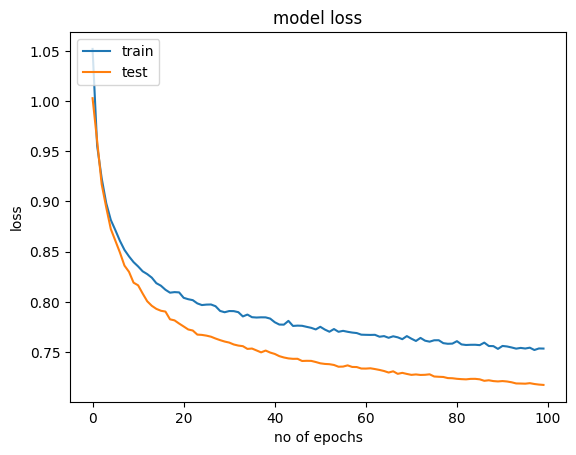

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

-------------------


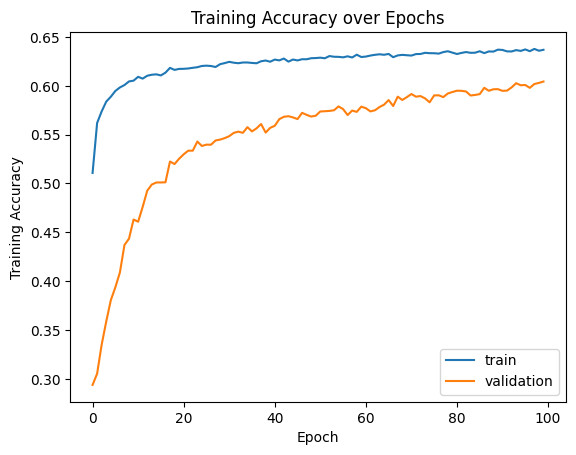

In [ ]:
print("-------------------")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

we do the same for RMSprop optimizer:

In [ ]:
def build_dnn_model(hp):
    model = tf.keras.Sequential()
    model.add(data_normalizer)

    for i in range(hp.Int('num_layers', 2, 4)):
        model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=92, max_value=192, step=32),activation='relu'))
        model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.00001),loss='categorical_crossentropy',metrics=['accuracy'])

    return model


!rm -r dnn_tune
tuner = kt.RandomSearch(
    build_dnn_model,  # The function to build the model
    objective='val_accuracy',  # The metric to optimize for
    max_trials=5,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train and evaluate for each trial
    project_name = "dnn_tune"
)

tuner.search(x_resampled, y_resampled, epochs=5, validation_split=0.2)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)
history = model.fit(x_resampled, y_resampled, epochs=100,batch_size=100,validation_split=0.2,shuffle=True)

Trial 5 Complete [00h 01m 01s]
val_accuracy: 0.31622377038002014

Best val_accuracy So Far: 0.4223345220088959
Total elapsed time: 00h 06m 13s
Epoch 1/100
1101/1101 [==============================] - 8s 7ms/step - loss: 1.1804 - accuracy: 0.4160 - val_loss: 1.1221 - val_accuracy: 0.2837
Epoch 2/100
1101/1101 [==============================] - 6s 5ms/step - loss: 1.0925 - accuracy: 0.4860 - val_loss: 1.0692 - val_accuracy: 0.2893
Epoch 3/100
1101/1101 [==============================] - 7s 6ms/step - loss: 1.0445 - accuracy: 0.5217 - val_loss: 1.0254 - val_accuracy: 0.2954
Epoch 4/100
1101/1101 [==============================] - 6s 5ms/step - loss: 1.0121 - accuracy: 0.5409 - val_loss: 1.0029 - val_accuracy: 0.2958
Epoch 5/100
1101/1101 [==============================] - 7s 6ms/step - loss: 0.9954 - accuracy: 0.5515 - val_loss: 0.9740 - val_accuracy: 0.3013
Epoch 6/100
1101/1101 [==============================] - 6s 5ms/step - loss: 0.9664 - accuracy: 0.5605 - val_loss: 0.9502 - val_accu

plotting the result:

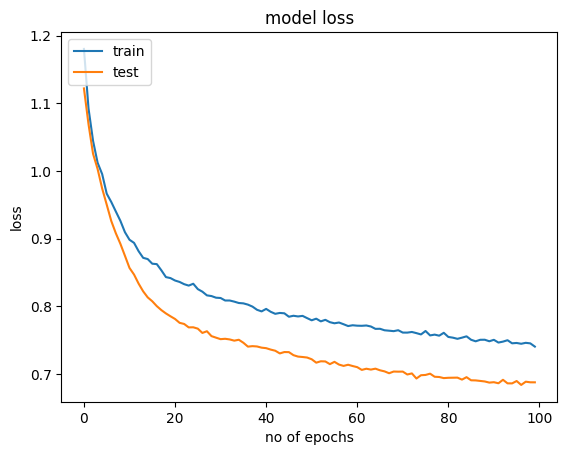

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

-------------------


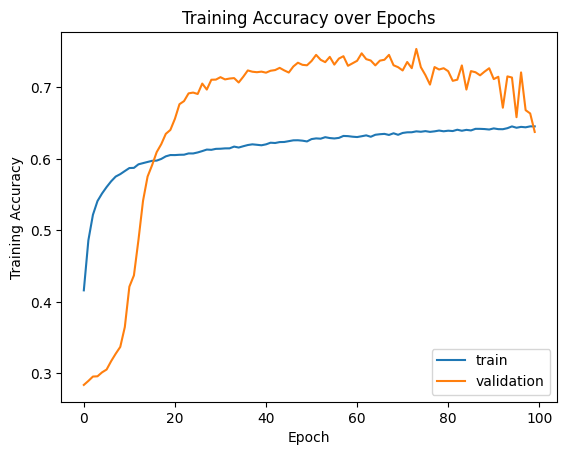

In [ ]:
print("-------------------")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

we also wanted to assign the hyperparameters by hand and compare the results, so we build another function without keras tuner which takes it's optimizer as a parameter:

In [ ]:
def create_model(the_optimizer, lr):
  model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape = x_train.shape[1:]),
    tf.keras.layers.Dense(192, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
  ])

  optimizer = the_optimizer(learning_rate=lr)

  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

here we make the model with adagrad:

In [ ]:
adagrad_model = create_model(tf.keras.optimizers.Adagrad,0.001)
history = adagrad_model.fit(x_resampled, y_resampled, epochs=100, batch_size=100,validation_split=0.20,shuffle=True)

Epoch 1/100
1101/1101 [==============================] - 7s 5ms/step - loss: 1.1658 - accuracy: 0.5031 - val_loss: 0.9188 - val_accuracy: 0.4312
Epoch 2/100
1101/1101 [==============================] - 5s 5ms/step - loss: 1.0322 - accuracy: 0.5466 - val_loss: 0.8677 - val_accuracy: 0.4715
Epoch 3/100
1101/1101 [==============================] - 6s 6ms/step - loss: 0.9856 - accuracy: 0.5574 - val_loss: 0.8399 - val_accuracy: 0.4978
Epoch 4/100
1101/1101 [==============================] - 5s 5ms/step - loss: 0.9575 - accuracy: 0.5637 - val_loss: 0.8121 - val_accuracy: 0.5340
Epoch 5/100
1101/1101 [==============================] - 6s 6ms/step - loss: 0.9335 - accuracy: 0.5726 - val_loss: 0.8016 - val_accuracy: 0.5472
Epoch 6/100
1101/1101 [==============================] - 5s 5ms/step - loss: 0.9176 - accuracy: 0.5747 - val_loss: 0.7911 - val_accuracy: 0.5525
Epoch 7/100
1101/1101 [==============================] - 6s 6ms/step - loss: 0.9051 - accuracy: 0.5790 - val_loss: 0.7824 - val_ac

and the results plotted:

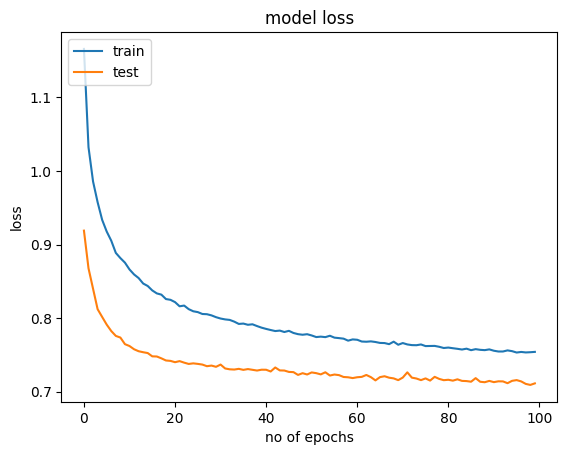

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

-------------------


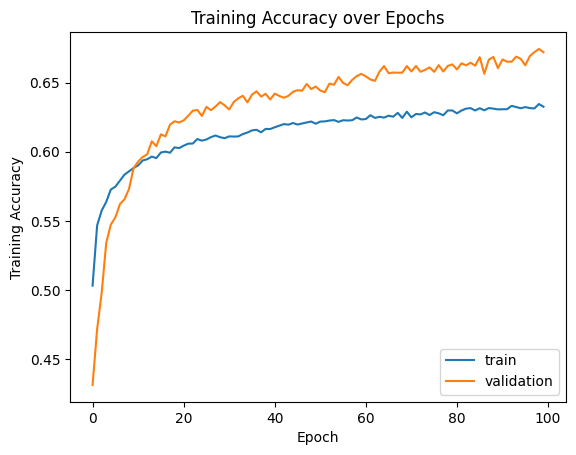

In [ ]:
print("-------------------")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

here we check the accuracy using our test data:

In [ ]:
loss, accuracy = adagrad_model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

696/696 [==============================] - 1s 2ms/step - loss: 0.7869 - accuracy: 0.5971
Test Accuracy: 0.5970980525016785


we will repeat the same proccess for RMSprop:

In [ ]:
rmsprop_model = create_model(tf.keras.optimizers.RMSprop,0.00001)
history = rmsprop_model.fit(x_resampled, y_resampled,batch_size = 100, epochs=100,validation_split = 0.2,shuffle=True)

Epoch 1/100
1101/1101 [==============================] - 8s 6ms/step - loss: 1.2756 - accuracy: 0.4285 - val_loss: 1.0477 - val_accuracy: 0.3642
Epoch 2/100
1101/1101 [==============================] - 5s 5ms/step - loss: 1.1278 - accuracy: 0.5042 - val_loss: 0.9654 - val_accuracy: 0.4107
Epoch 3/100
1101/1101 [==============================] - 7s 6ms/step - loss: 1.0641 - accuracy: 0.5305 - val_loss: 0.9107 - val_accuracy: 0.4656
Epoch 4/100
1101/1101 [==============================] - 5s 5ms/step - loss: 1.0285 - accuracy: 0.5449 - val_loss: 0.8766 - val_accuracy: 0.4896
Epoch 5/100
1101/1101 [==============================] - 6s 6ms/step - loss: 0.9919 - accuracy: 0.5575 - val_loss: 0.8542 - val_accuracy: 0.5230
Epoch 6/100
1101/1101 [==============================] - 5s 5ms/step - loss: 0.9734 - accuracy: 0.5604 - val_loss: 0.8288 - val_accuracy: 0.5525
Epoch 7/100
1101/1101 [==============================] - 6s 5ms/step - loss: 0.9530 - accuracy: 0.5669 - val_loss: 0.8121 - val_ac

plotting the result:

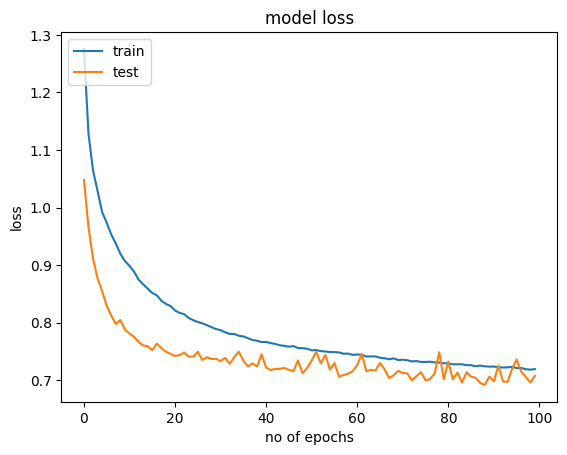

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

-------------------


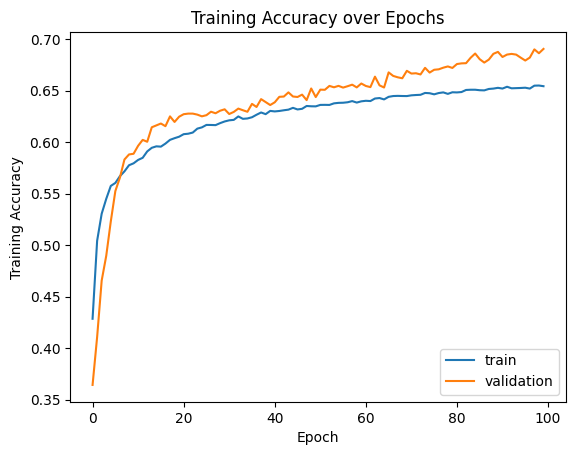

In [ ]:
print("-------------------")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

checking the accuracy:

In [ ]:
loss, accuracy = rmsprop_model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

696/696 [==============================] - 1s 2ms/step - loss: 0.7711 - accuracy: 0.6143
Test Accuracy: 0.6143030524253845


References:

(1) Introduction to keras tuner: https://www.tensorflow.org/tutorials/keras/keras_tuner
